<a href="https://colab.research.google.com/github/divya43-gude/PRODIGY_Ml_03/blob/main/PRODIGY_ML_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import zipfile
import os

# Upload the zip file
uploaded = files.upload()

# Extract it
zip_path = list(uploaded.keys())[0]
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(" Dataset extracted:", os.listdir(extract_path))


Saving cats&dogs.zip to cats&dogs.zip
 Dataset extracted: ['dogs', 'cats']


In [2]:
import cv2
import numpy as np
from skimage.feature import hog

# Image resize settings
img_size = (64, 64)
X = []
y = []

# Load cats and dogs
for label, category in enumerate(["cats", "dogs"]):
    folder = os.path.join(extract_path, category)
    for img_file in os.listdir(folder):
        img_path = os.path.join(folder, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is None:
            continue

        img = cv2.resize(img, img_size)
        features, _ = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True, visualize=True)

        X.append(features)
        y.append(label)  # 0 = cat, 1 = dog

X = np.array(X)
y = np.array(y)

print(f"Stored {len(X)} images in memory.")


Stored 20 images in memory.


Model trained and stored in memory.


Saving 4.jpg to 4 (1).jpg


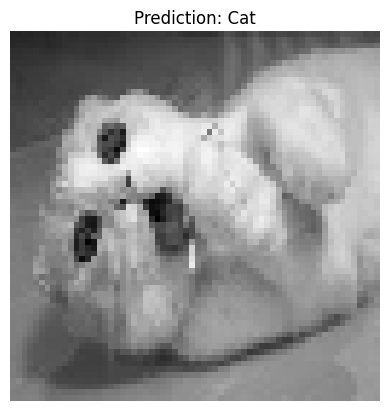

Confidence Score: -1.00


In [5]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt


# Train the SVM classifier
model = SVC(kernel='linear')
model.fit(X, y)

print("Model trained and stored in memory.")
# Upload any new image
uploaded_test = files.upload()
test_img_path = list(uploaded_test.keys())[0]

# Preprocess the uploaded image
test_img = cv2.imread(test_img_path, cv2.IMREAD_GRAYSCALE)
test_img = cv2.resize(test_img, img_size)
features, _ = hog(test_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True, visualize=True)

# Get SVM decision score
score = model.decision_function([features])[0]
prediction = model.predict([features])[0]

# Set threshold for "unknown" (tweak this if needed)
if abs(score) < 0.5:
    label = " Not a Cat or Dog"
elif prediction == 0:
    label = "Cat"
else:
    label = " Dog"
plt.imshow(test_img, cmap='gray')
plt.title(f"Prediction: {label}")
plt.axis('off')
plt.show()

print(f"Confidence Score: {score:.2f}")
